In [4]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 2 10:38:28 2018

@author: Shawnzy
"""
import warnings
warnings.filterwarnings('ignore')
#%% Imports
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from time import clock
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans as kmeans
from sklearn.mixture import GaussianMixture as GMM
from collections import defaultdict
from sklearn import metrics
import sys
import matplotlib.pyplot as plt 


#out = './{}/'.format(sys.argv[1])
out = './'

np.random.seed(0)

# Cancer Dataset - 32 Attributes - 2 Classes
cancer = pd.read_hdf('../Input_Data/datasets.hdf','cancer')
cancerX = cancer.drop('diagnosis',1).copy().values
cancerY = cancer['diagnosis'].copy().values

# Madelon Dataset - 500 Attributes - 2 Classes
madelon = pd.read_hdf('../Input_Data/datasets.hdf','madelon')        
madelonX = madelon.drop('Class',1).copy().values
madelonY = madelon['Class'].copy().values

# Scale Attributes (Very important for clustering)
madelonX = StandardScaler().fit_transform(madelonX) 
cancerX= StandardScaler().fit_transform(cancerX)

evals = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
#evas = #Sum of Square Error
        #Log Likelihood
        #Adjusted Rand score
        #Adjusted Mutual Info
        #Homogeneity
        #Completeness
        #Silhouette score
        #Training times 

# Initialize clustering algorithms
km = kmeans(random_state=5)
gmm = GMM(random_state=5)


range_k_clusters =  [2,3,4,5,6,8,10,14,18,22,26,28,32,36,38,42,46,50,60,70]    

for k in range_k_clusters:
    #----------------------------------------Kmeans----------------------------------------#
    #----------Madelon----------#
    
    # Fit and Predict
    km.set_params(n_clusters=k)
    st = clock()
    km.fit(madelonX)
    ft = clock()
    predictY = km.predict(madelonX)
    pt = clock()
    
    # Save Fit and Prediction Times
    evals['Kmeans']['Madelon']['Fit_Time'][k] = ft - st
    evals['Kmeans']['Madelon']['Predict_Time'][k] = pt - ft
    
    # Save Evaluation Metrics
    evals['Kmeans']['Madelon']['SSE'][k] = -km.score(madelonX)
    evals['Kmeans']['Madelon']['ARI'][k] = metrics.adjusted_rand_score(madelonY,predictY)
    evals['Kmeans']['Madelon']['AMI'][k] = metrics.adjusted_mutual_info_score(madelonY,predictY)
    evals['Kmeans']['Madelon']['HOM'][k] = metrics.homogeneity_score(madelonY,predictY)
    evals['Kmeans']['Madelon']['COM'][k] = metrics.completeness_score(madelonY,predictY)
    if k > 1: evals['Kmeans']['Madelon']['SIL'][k] = metrics.silhouette_score(madelonX,predictY)
    

    #----------Cancer----------#
   
     # Fit and Predict
#     km.set_params(n_clusters=k)
#     st = clock()
#     km.fit(cancerX)
#     ft = clock()
#     predictY = km.predict(cancerX)
#     pt = clock()
    
#     # Save Fit and Prediction Times
#     evals['Kmeans']['Cancer']['Fit_Time'][k] = ft - st
#     evals['Kmeans']['Cancer']['Predict_Time'][k] = pt - ft
    
#     # Save Evaluation Metrics
#     evals['Kmeans']['Cancer']['SSE'][k] = -km.score(cancerX)
#     evals['Kmeans']['Cancer']['ARI'][k] = metrics.adjusted_rand_score(cancerY,predictY)
#     evals['Kmeans']['Cancer']['AMI'][k] = metrics.adjusted_mutual_info_score(cancerY,predictY)
#     evals['Kmeans']['Cancer']['HOM'][k] = metrics.homogeneity_score(cancerY,predictY)
#     evals['Kmeans']['Cancer']['COM'][k] = metrics.completeness_score(cancerY,predictY)
#     if k > 1: evals['Kmeans']['Cancer']['SIL'][k] = metrics.silhouette_score(cancerX,predictY)

    #------------------------------Expectation Maximization------------------------------#
    #----------Madelon----------# 
    
    # Fit and Predict
    gmm.set_params(n_components=k)    
    st = clock()
    gmm.fit(madelonX)
    ft = clock()
    predictY = gmm.predict(madelonX)
    pt = clock()
    
    # Save Fit and Prediction Times
    evals['ExpMax']['Madelon']['Fit_Time'][k] = ft - st
    evals['ExpMax']['Madelon']['Predict_Time'][k] = pt - ft
    
    # Save Evaluation Metrics
    evals['ExpMax']['Madelon']['LGL'][k] = gmm.score(madelonX)
    evals['ExpMax']['Madelon']['ARI'][k] = metrics.adjusted_rand_score(madelonY,predictY)
    evals['ExpMax']['Madelon']['AMI'][k] = metrics.adjusted_mutual_info_score(madelonY,predictY)
    evals['ExpMax']['Madelon']['HOM'][k] = metrics.homogeneity_score(madelonY,predictY)
    evals['ExpMax']['Madelon']['COM'][k] = metrics.completeness_score(madelonY,predictY)
    if k > 1: evals['ExpMax']['Madelon']['SIL'][k] = metrics.silhouette_score(madelonX,predictY)
    

    #----------Cancer----------#
    
#     # Fit and Predict
#     gmm.set_params(n_components=k)    
#     st = clock()
#     gmm.fit(cancerX)
#     ft = clock()
#     predictY = gmm.predict(cancerX)
#     pt = clock()
    
#     # Save Fit and Prediction Times
#     evals['ExpMax']['Cancer']['Fit_Time'][k] = ft - st
#     evals['ExpMax']['Cancer']['Predict_Time'][k] = pt - ft
    
#     # Save Evaluation Metrics
#     evals['ExpMax']['Cancer']['LGL'][k] = gmm.score(cancerX)
#     evals['ExpMax']['Cancer']['ARI'][k] = metrics.adjusted_rand_score(cancerY,predictY)
#     evals['ExpMax']['Cancer']['AMI'][k] = metrics.adjusted_mutual_info_score(cancerY,predictY)
#     evals['ExpMax']['Cancer']['HOM'][k] = metrics.homogeneity_score(cancerY,predictY)
#     evals['ExpMax']['Cancer']['COM'][k] = metrics.completeness_score(cancerY,predictY)
#     if k > 1: evals['ExpMax']['Cancer']['SIL'][k] = metrics.silhouette_score(cancerX,predictY)
    
    


In [6]:
# df_ck = pd.DataFrame(evals['Kmeans']['Cancer'])
df_mk = pd.DataFrame(evals['Kmeans']['Madelon'])
# df_ce = pd.DataFrame(evals['ExpMax']['Cancer'])
df_me = pd.DataFrame(evals['ExpMax']['Madelon'])

# df_ck.to_hdf(out+'results.hdf','cancer_kmeans',complib='blosc',complevel=9)
df_mk.to_hdf(out+'results.hdf','madelon_kmeans',complib='blosc',complevel=9)
# df_ce.to_hdf(out+'results.hdf','cancer_expmax',complib='blosc',complevel=9)
df_me.to_hdf(out+'results.hdf','madelon_expmax',complib='blosc',complevel=9)


In [89]:
#Cluster Vizualization
madelonX2D = TSNE(verbose=10,random_state=5).fit_transform(madelonX)
cancerX2D = TSNE(verbose=10,random_state=5).fit_transform(cancerX)

madelon2D = pd.DataFrame(np.hstack((madelonX2D,np.atleast_2d(madelonY).T)),columns=['x','y','target'])
cancer2D = pd.DataFrame(np.hstack((cancerX2D,np.atleast_2d(cancerY).T)),columns=['x','y','target'])

madelon2D.to_hdf(out+'results.hdf','madelon_viz',complib='blosc',complevel=9)
cancer2D.to_hdf(out+'results.hdf','cancer_viz',complib='blosc',complevel=9)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2600 samples in 0.130s...
[t-SNE] Computed neighbors for 2600 samples in 6.866s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2600
[t-SNE] Computed conditional probabilities for sample 2000 / 2600
[t-SNE] Computed conditional probabilities for sample 2600 / 2600
[t-SNE] Mean sigma: 3.475018
[t-SNE] Computed conditional probabilities in 0.804s
[t-SNE] Iteration 50: error = 105.8703918, gradient norm = 0.2295838 (50 iterations in 3.632s)
[t-SNE] Iteration 100: error = 106.0408096, gradient norm = 0.2777095 (50 iterations in 3.883s)
[t-SNE] Iteration 150: error = 108.2641144, gradient norm = 0.2171160 (50 iterations in 4.129s)
[t-SNE] Iteration 200: error = 110.6933975, gradient norm = 0.2040289 (50 iterations in 3.775s)
[t-SNE] Iteration 250: error = 109.5516129, gradient norm = 0.2065555 (50 iterations in 3.743s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 109.551613
[t-SNE] Iteration 300

In [90]:
clusterA = madelon2D[madelon2D.target == 1.0]
clusterB = madelon2D[madelon2D.target == 2.0]
xA = clusterA.x.values
yA = clusterA.y.values
xB = clusterB.x.values
yB = clusterB.y.values

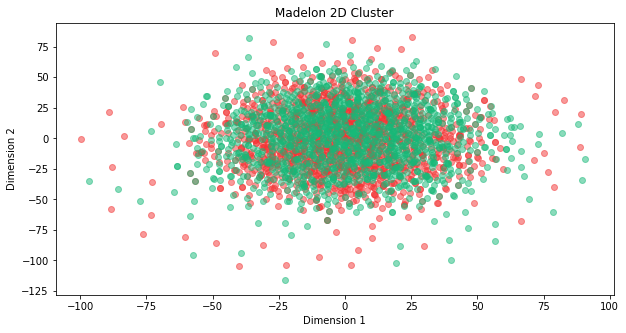

In [91]:
fig = plt.figure()
fig.set_size_inches(10, 5)
ax = plt.subplot(111)
plt.title('Madelon 2D Cluster')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

plt.scatter(xA, yA, c="#f33535", alpha=0.5)
plt.scatter(xB, yB, c="#17b978", alpha=0.5)


# plt.savefig('./part1_plots/1_LC_Accuracy-{}.png'.format(prob['title']),bbox_inches="tight")
plt.show()